In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/root/work/cifar10",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(32, 32),
  batch_size=100)

Found 60000 files belonging to 10 classes.
Using 48000 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/root/work/cifar10",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(32, 32),
  batch_size=100)

Found 60000 files belonging to 10 classes.
Using 12000 files for validation.


In [ ]:
train_ds.class_names

['0_airplane',
 '1_automobile',
 '2_bird',
 '3_cat',
 '4_deer',
 '5_dog',
 '6_frog',
 '7_horse',
 '8_ship',
 '9_truck']

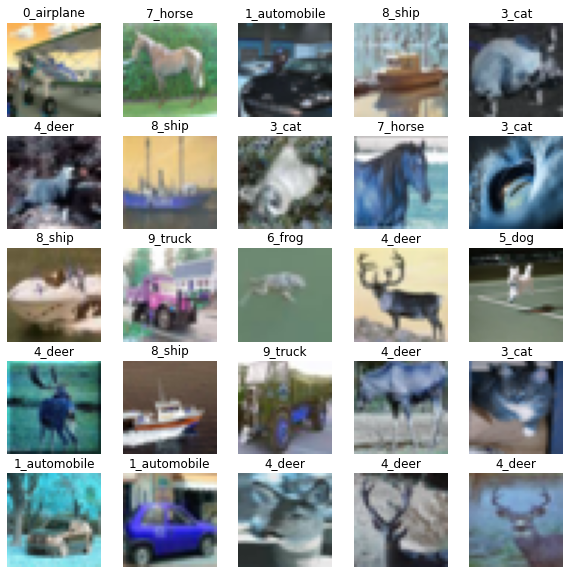

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 32, 32, 3)
(100,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.10588236 0.98823535


In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)         

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
480/480 [==============================] - 68s 139ms/step - loss: 1.7864 - accuracy: 0.3501 - val_loss: 1.3206 - val_accuracy: 0.5343
Epoch 2/10
480/480 [==============================] - 50s 104ms/step - loss: 1.2169 - accuracy: 0.5676 - val_loss: 1.0961 - val_accuracy: 0.6202
Epoch 3/10
480/480 [==============================] - 53s 111ms/step - loss: 1.0436 - accuracy: 0.6367 - val_loss: 1.0125 - val_accuracy: 0.6467
Epoch 4/10
480/480 [==============================] - 50s 104ms/step - loss: 0.9589 - accuracy: 0.6682 - val_loss: 0.9416 - val_accuracy: 0.6707
Epoch 5/10
480/480 [==============================] - 50s 105ms/step - loss: 0.8775 - accuracy: 0.6923 - val_loss: 0.9061 - val_accuracy: 0.6848
Epoch 6/10
480/480 [==============================] - 50s 104ms/step - loss: 0.8187 - accuracy: 0.7128 - val_loss: 0.9000 - val_accuracy: 0.6900
Epoch 7/10
480/480 [==============================] - 50s 104ms/step - loss: 0.7641 - accuracy: 0.7354 - val_loss: 0.8860 - val_ac

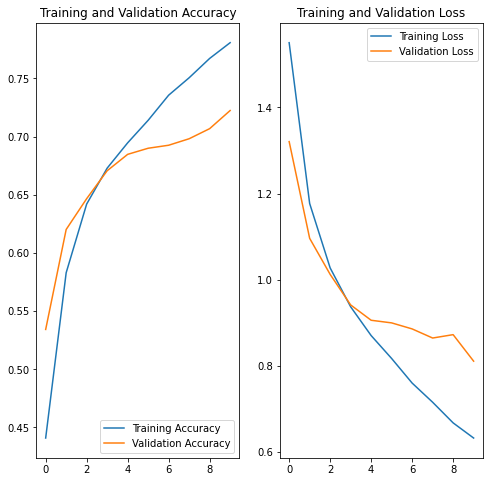

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow import keras
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

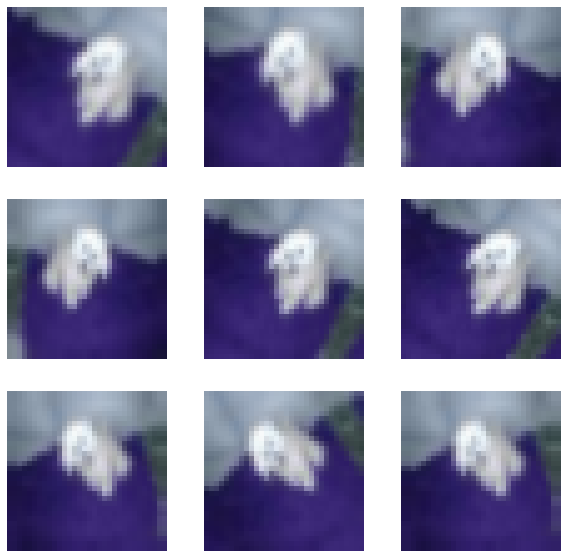

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
480/480 [==============================] - 96s 198ms/step - loss: 1.8948 - accuracy: 0.3023 - val_loss: 1.5432 - val_accuracy: 0.4464
Epoch 2/15
480/480 [==============================] - 83s 173ms/step - loss: 1.4535 - accuracy: 0.4765 - val_loss: 1.3219 - val_accuracy: 0.5238
Epoch 3/15
480/480 [==============================] - 83s 173ms/step - loss: 1.3327 - accuracy: 0.5264 - val_loss: 1.2301 - val_accuracy: 0.5567
Epoch 4/15
480/480 [==============================] - 83s 173ms/step - loss: 1.2609 - accuracy: 0.5491 - val_loss: 1.0958 - val_accuracy: 0.6089
Epoch 5/15
480/480 [==============================] - 83s 174ms/step - loss: 1.1927 - accuracy: 0.5755 - val_loss: 1.1278 - val_accuracy: 0.6027
Epoch 6/15
480/480 [==============================] - 83s 173ms/step - loss: 1.1466 - accuracy: 0.5926 - val_loss: 1.1013 - val_accuracy: 0.6193
Epoch 7/15
480/480 [==============================] - 83s 173ms/step - loss: 1.1132 - accuracy: 0.6088 - val_loss: 1.0073 - val_ac

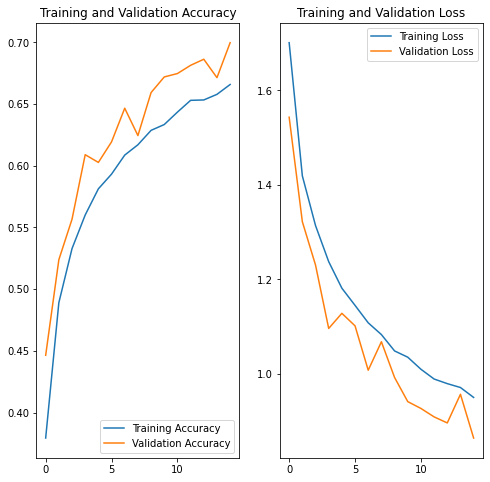

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img = keras.preprocessing.image.load_img('plane.jpg', target_size=(32, 32))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_ds.class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 0_airplane with a 21.97 percent confidence.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26e5d5b4-a604-4f7b-aef4-7756f8127ef0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>